In [1]:
import time
import random
import sys
from pathlib import Path
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools

In [2]:
# show full results
np.set_printoptions(threshold=sys.maxsize)

# Defining query smile
query = Chem.MolFromSmiles('[O-]C(/C=C/C(Nc(cc1)ncc1[N+]([O-])=O)=O)=O')
fp1 = AllChem.GetMorganFingerprintAsBitVect(query,2)

In [ ]:
#Test reading of compounds
specs=pd.read_csv("/home/chuck/Downloads/SPECS-SMI.csv", header=0, sep=',', engine='python')
for i in specs['SMILES']:
    m = Chem.MolFromSmiles(i)
    if m is None:
        print(i)

In [3]:
# Reading of compounds
specs=pd.read_csv("/home/chuck/Downloads/SPECS-SMI.csv", header=0, sep=',', engine='python')
molecules = specs.SMILES.apply(Chem.MolFromSmiles)
mols_fps=[AllChem.GetMorganFingerprintAsBitVect(x,2) for x in molecules]

In [4]:
pairwise=[]
for mol in mols_fps:
    sim = DataStructs.TanimotoSimilarity(fp1,mol)
    pairwise.append(sim)
specs['Similarity'] = pairwise
specs.sort_values(by=['Similarity'], inplace=True, ascending=False)

/tmp/ipykernel_1110/3164089452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Similarity'] = df['Similarity'].round(decimals = 2)
/home/chuck/anaconda3/lib/python3.10/site-packages/rdkit/Chem/PandasTools.py:449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


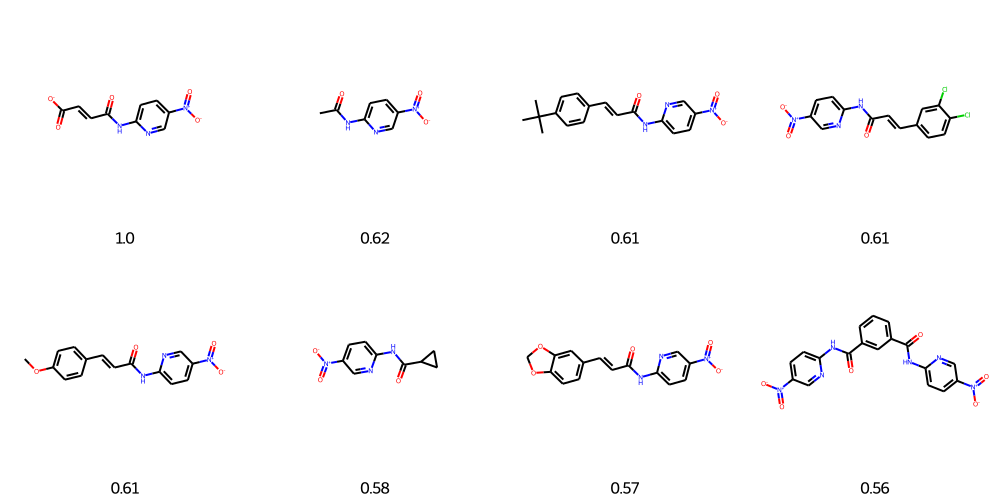

In [9]:
df = specs.head(8)
df['Similarity'] = df['Similarity'].round(decimals = 2)

PandasTools.AddMoleculeColumnToFrame(df, smilesCol='SMILES')
PandasTools.FrameToGridImage(df, legendsCol="Similarity", molsPerRow=4, subImgSize=(250, 250))

In [6]:
specs.to_csv("/home/chuck/Downloads/SPECS-SMI-SIM.csv", index=False)